In [1]:
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
#import numpy as np
from setup import config
from netvlad import NetVLAD
from netvlad import EmbedNet
from netvlad import TripletNet
from torchvision.models import alexnet, AlexNet_Weights
from torchvision import transforms
import torch.nn.functional as F

In [3]:
model = alexnet(pretrained=False)
model.cuda() # GPU mode 
net_vlad = NetVLAD(num_clusters=21, dim=256, alpha=1.0)
embednet = EmbedNet(model, net_vlad).cuda()
triplet = TripletNet(embednet).cuda()
checkpoint = torch.load('/home/student4/PR_code/checkpoint_1.pth')
triplet.load_state_dict(checkpoint)

model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [20]:
image_1 = '/home/student4/data/school_data/real_img.jpg'
image_2 = '/home/student4/data/school_data/query_positive.jpg'

In [5]:
from PIL import Image
def preprocess_image(image_path, transform):
    # 이미지를 열고 RGB 채널로 변환
    image = Image.open(image_path).convert('RGB')
    # 전달받은 전처리(transform) 적용
    image = transform(image)
    image = image.unsqueeze(0)  # 배치 차원 추가
    if torch.cuda.is_available():
        image = image.cuda()  # GPU로 옮김
    return image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 예시로 사용한 크기
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [21]:
image_1 = preprocess_image(image_1, transform)
image_2 = preprocess_image(image_2, transform)

In [7]:
feature1 = triplet.feature_extract(image_1)
feature2 = triplet.feature_extract(image_2)

In [8]:
distance = torch.norm(feature1 - feature2, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.016907714307308197


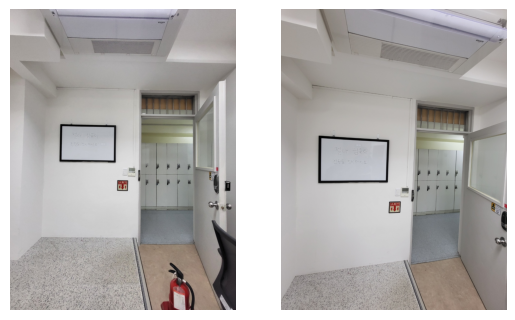

In [9]:
import matplotlib.pyplot as plt
image_1 = '/home/student4/data/school_data/real_img.jpg'
image_2 = '/home/student4/data/school_data/query_positive.jpg'
image_1=Image.open(image_1)
image_2=Image.open(image_2)
fig, ax = plt.subplots(1, 2)  # 1행 2열의 서브플롯 생성
ax[0].imshow(image_1)
ax[0].axis('off')  # 첫 번째 축 표시 없앰
ax[1].imshow(image_2)
ax[1].axis('off')  # 두 번째 축 표시 없앰

plt.show()


In [10]:
image_3 = '/home/student4/data/school_data/airplaneshot.jpg' #항공샷
image_3 = preprocess_image(image_3, transform)
feature3 = triplet.feature_extract(image_3)
distance = torch.norm(feature1 - feature3, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.06466886401176453


In [11]:
image_4 = '/home/student4/data/school_data/dif.jpg' #다른 사진
image_4 = preprocess_image(image_4, transform)
feature4 = triplet.feature_extract(image_4)
distance = torch.norm(feature1 - feature4, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.1824033111333847


In [12]:
image_5 = '/home/student4/data/school_data/좌측.jpg' #좌측만
image_5 = preprocess_image(image_5, transform)
feature5 = triplet.feature_extract(image_5)
distance = torch.norm(feature1 - feature5, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.06686756759881973


In [13]:
image_6 = '/home/student4/data/school_data/우측.jpg' #우측만
image_6 = preprocess_image(image_6, transform)
feature6 = triplet.feature_extract(image_6)
distance = torch.norm(feature1 - feature6, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.09341493248939514


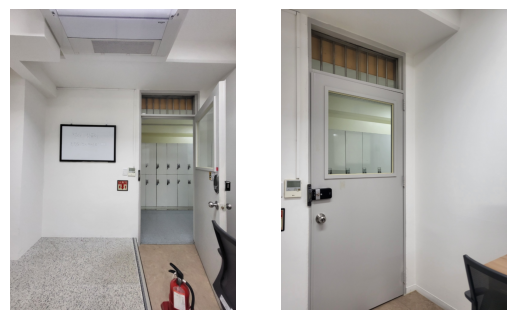

In [52]:
import matplotlib.pyplot as plt
image_1 = '/home/student4/data/school_data/real_img.jpg'
image_6 = '/home/student4/data/school_data/우측.jpg'
image_1=Image.open(image_1)
image_6=Image.open(image_6)
fig, ax = plt.subplots(1, 2)  # 1행 2열의 서브플롯 생성
ax[0].imshow(image_1)
ax[0].axis('off')  # 첫 번째 축 표시 없앰
ax[1].imshow(image_6)
ax[1].axis('off')  # 두 번째 축 표시 없앰

plt.show()


In [14]:
image_7 = '/home/student4/data/school_data/another_viewpoint.jpg' #다른각도
image_7 = preprocess_image(image_7, transform)
feature7 = triplet.feature_extract(image_7)
distance = torch.norm(feature1 - feature7, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.11004510521888733


In [15]:
image_8 = '/home/student4/data/school_data/df2.jpg' #반대편
image_8 = preprocess_image(image_8, transform)
feature8 = triplet.feature_extract(image_8)
distance = torch.norm(feature1 - feature8, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.15786844491958618


프로젝트실 반대편 사진과 distance가 크지 않음

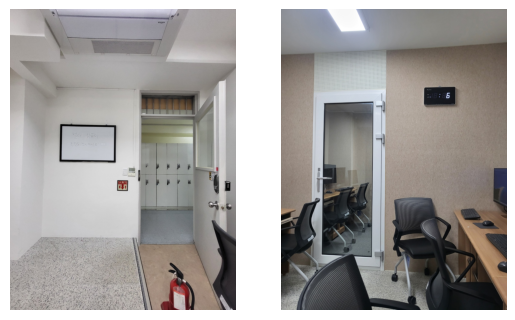

In [16]:
import matplotlib.pyplot as plt

image_1 = '/home/student4/data/school_data/real_img.jpg'
image_8 = '/home/student4/data/school_data/df2.jpg'
image_1=Image.open(image_1)
image_8=Image.open(image_8)
fig, ax = plt.subplots(1, 2)  # 1행 2열의 서브플롯 생성
ax[0].imshow(image_1)
ax[0].axis('off')  # 첫 번째 축 표시 없앰
ax[1].imshow(image_8)
ax[1].axis('off')  # 두 번째 축 표시 없앰

plt.show()


In [17]:
image_1 = '/home/student4/data/school_data/real_img.jpg'
image_9 = '/home/student4/data/school_data/floor.jpg' #바닥
image_1 = preprocess_image(image_1, transform)
image_9 = preprocess_image(image_9, transform)
feature1 = triplet.feature_extract(image_1)
feature9 = triplet.feature_extract(image_9)
distance = torch.norm(feature1 - feature9, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.1339034140110016


10epoch기준
완전 다른건 0.3이상 나오는듯.  
해결해야할점: 프젝실 반대편 image가 생각보다 distance가 작음
1epcoh기준
같은거는 0.1이하고 완전 비슷한건 0.016나옴 -> 0.1 기준으로 하면 될듯?

In [39]:
image_1 = '/home/student4/data/school_data/미가엘실험/미가엘원본.jpg'
image_9 = '/home/student4/data/school_data/미가엘실험/미가엘계단쪽(neg).jpg'
image_1 = preprocess_image(image_1, transform)
image_9 = preprocess_image(image_9, transform)
feature1 = triplet.feature_extract(image_1)
feature9 = triplet.feature_extract(image_9)
distance = torch.norm(feature1 - feature9, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.08234056085348129


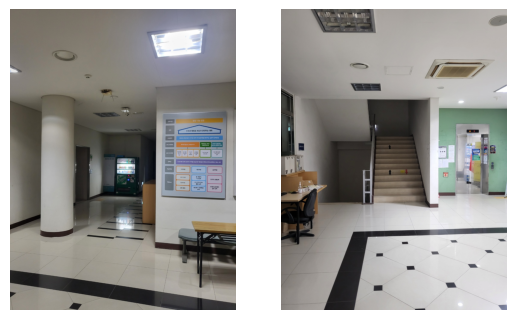

In [41]:
import matplotlib.pyplot as plt
image_1 = '/home/student4/data/school_data/미가엘실험/미가엘원본.jpg'
image_6 = '/home/student4/data/school_data/미가엘실험/미가엘계단쪽(neg).jpg'
image_1=Image.open(image_1)
image_6=Image.open(image_6)
fig, ax = plt.subplots(1, 2)  # 1행 2열의 서브플롯 생성
ax[0].imshow(image_1)
ax[0].axis('off')  # 첫 번째 축 표시 없앰
ax[1].imshow(image_6)
ax[1].axis('off')  # 두 번째 축 표시 없앰

plt.show()

바닥이랑 천장 때문에 좀 가깝게 나오는듯.

In [40]:
image_1 = '/home/student4/data/school_data/미가엘실험/미가엘원본.jpg'
image_9 = '/home/student4/data/school_data/미가엘실험/미가엘문쪽(neg).jpg'
image_1 = preprocess_image(image_1, transform)
image_9 = preprocess_image(image_9, transform)
feature1 = triplet.feature_extract(image_1)
feature9 = triplet.feature_extract(image_9)
distance = torch.norm(feature1 - feature9, p=2)

print(f"유클리디안 거리: {distance.item()}")

유클리디안 거리: 0.18566666543483734
